# <font color='056938'> **Librerias** </font>

In [ ]:
## Remove Warnings
import warnings
warnings.filterwarnings("ignore")

## Data
import pandas as pd
import numpy as np
from itertools import product

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

## Modelling
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error, r2_score, classification_report
import math

# <font color='056938'> **Cargar bases de datos de calculo diferencial** </font>

In [ ]:
file_id = "1mdx8UIWd9xiWAK2MlXJw6ilPcYHTxWyy"
df_calcudif = pd.read_excel(f'https://docs.google.com/uc?export=download&id={file_id}')
df_calcudif


,departamento,sexo,edad,direccion,t_familia,padres_status,madre_edu,padre_edu,madre_trab,padre_trab,...,relacion_fam,tiempo_libre,salir_amigos,cons_alcohol_sem,cons_alcohol_finde,salud,ausencias,nota_01,nota_02,nota_03
0,II,M,18,U,mayor_3,S,4,4,en_casa,profesor,...,4,3,4,1,1,3,6,5,6,6
1,II,M,17,U,mayor_3,J,1,1,en_casa,otro,...,5,3,3,1,1,3,4,5,5,6
2,II,M,15,U,menor_e3,J,1,1,en_casa,otro,...,4,3,2,2,3,3,10,7,8,10
3,II,M,15,U,mayor_3,J,4,2,salud,servicios,...,3,2,2,1,1,5,2,15,14,15
4,II,M,16,U,mayor_3,J,3,3,otro,otro,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,MS,H,21,R,mayor_3,J,1,1,otro,otro,...,5,5,3,3,3,3,3,10,8,7
393,MS,H,18,R,menor_e3,J,3,2,servicios,otro,...,4,4,1,3,4,5,0,11,12,10
394,MS,H,19,U,menor_e3,J,1,1,otro,en_casa,...,3,2,3,3,3,5,5,8,9,9
395,II,M,18,U,mayor_3,S,4,4,en_casa,profesor,...,4,3,4,1,1,3,6,5,6,6


# <font color='056938'>  a)Limpieza de datos




<font color='056938'>1. Verificar Datos duplicados</font>

Se verifica que en cada base de datos si existen datos duplicados

In [ ]:
# Identificar filas duplicadas en la base de datos de calculo diferencial
duplicados1 = df_calcudif.duplicated()

# Imprimir las filas duplicadas
print(duplicados1)

0      False
1      False
2      False
3      False
4      False
       ...  
392    False
393    False
394    False
395     True
396     True
Length: 397, dtype: bool


In [ ]:
# Identificar las filas duplicadas incluyendo todas las filas duplicadas
duplicados1 = df_calcudif.duplicated(keep=False)

# Filtrar y mostrar las filas duplicadas
filas_duplicadas_calcudif = df_calcudif[duplicados1]

filas_duplicadas_calcudif

,departamento,sexo,edad,direccion,t_familia,padres_status,madre_edu,padre_edu,madre_trab,padre_trab,...,relacion_fam,tiempo_libre,salir_amigos,cons_alcohol_sem,cons_alcohol_finde,salud,ausencias,nota_01,nota_02,nota_03
0,II,M,18,U,mayor_3,S,4,4,en_casa,profesor,...,4,3,4,1,1,3,6,5,6,6
383,MS,H,19,R,mayor_3,J,1,1,otro,servicios,...,4,3,2,1,3,5,0,6,5,0
395,II,M,18,U,mayor_3,S,4,4,en_casa,profesor,...,4,3,4,1,1,3,6,5,6,6
396,MS,H,19,R,mayor_3,J,1,1,otro,servicios,...,4,3,2,1,3,5,0,6,5,0


Se identificaron datos duplicados; sin embargo, no se eliminan debido a la ausencia de una variable identificadora única, como la cédula del estudiante. Esto deja abierta la posibilidad de que existan dos personas distintas con datos idénticos.

 <font color='056938'> **2. Verificar datos faltantes** </font>

In [ ]:
# Muestra las variables que tienen datos faltantes en la base de datos calculo diferencial
df_calcudif.isnull().any()

,0
departamento,False
sexo,False
edad,False
direccion,False
t_familia,False
padres_status,False
madre_edu,False
padre_edu,False
madre_trab,False
padre_trab,False


Se concluye que no existen datos faltantes en las variables de la base de datos. Sin embargo, es posible que haya valores negativos o inconsistentes, los cuales podrían ser identificados durante la etapa de detección de outliers.

# <font color='056938'> **3. Correcion de errores** </font>

Se ha identificado que en las bases de datos, las variables "internet" y "relacion_sen" están en inglés. Por lo tanto, se procede a corregirlas al idioma español para evitar problemas futuros al convertir los datos a valores binarios, donde 0 representará "No" y 1 representará "Sí".

In [ ]:
# Remplazo de respuesta Yes a español
df_calcudif = df_calcudif.replace('yes', 'si')
df_calcudif.internet

,internet
0,no
1,si
2,si
3,si
4,no
...,...
392,no
393,si
394,si
395,no


# <font color='056938'> **b)Análisis exploratorio de los datos.** </font>

<font color='056938'> Verificar tipo de variable</font>
---

In [ ]:
#Base de datos calculo diferencial
df_calcudif.dtypes

,0
departamento,object
sexo,object
edad,int64
direccion,object
t_familia,object
padres_status,object
madre_edu,int64
padre_edu,int64
madre_trab,object
padre_trab,object


En las base de dato, Python interpreta las variables "salir_amigos", "Tiempo_libre", "relacion_fam", "cons_alcohol_sem" y "salud" como numéricas. Sin embargo, estas variables deberían considerarse cualitativas, ya que se califican en una escala del 1 al 5, donde 1 representa una calificación baja y 5 una calificación alta. De manera similar, las variables "madre_edu" y "padre_edu", que indican el nivel de estudio de los padres, estas se clasifican de 0 a 4, así como "t_examen", "t_estudio" y "faltas", que se clasifican del 1 al 4 y 0 al 4 respectivamente,  también deben tratarse como variables cualitativas. Por lo tanto, se procederá a convertir estas variables a cualitativas.

In [ ]:
# Cambiar en la bese de datos de calculo diferencial el tipo de la variable de numérica a object
df_calcudif['relacion_fam'] = df_calcudif['relacion_fam'].astype('object')
df_calcudif['tiempo_libre'] = df_calcudif['tiempo_libre'].astype('object')
df_calcudif['salir_amigos'] = df_calcudif['salir_amigos'].astype('object')
df_calcudif['cons_alcohol_sem'] = df_calcudif['cons_alcohol_sem'].astype('object')
df_calcudif['cons_alcohol_finde'] = df_calcudif['cons_alcohol_finde'].astype('object')
df_calcudif['salud'] = df_calcudif['salud'].astype('object')
df_calcudif['madre_edu'] = df_calcudif['madre_edu'].astype('object')
df_calcudif['padre_edu'] = df_calcudif['padre_edu'].astype('object')
df_calcudif['t_examen'] = df_calcudif['t_examen'].astype('object')
df_calcudif['t_estudio'] = df_calcudif['t_estudio'].astype('object')
df_calcudif['faltas'] = df_calcudif['faltas'].astype('object')


In [ ]:
#Base de datos calculo diferencial
df_calcudif.dtypes

,0
departamento,object
sexo,object
edad,int64
direccion,object
t_familia,object
padres_status,object
madre_edu,object
padre_edu,object
madre_trab,object
padre_trab,object


# <font color='056938'> **1. Análisis univariado para variables categóricas** </font>
---

<font color='056938'> *** Frecuencias por cada variable categórica** </font>

In [ ]:
df_calcudif.describe(include='object')

,departamento,sexo,direccion,t_familia,padres_status,madre_edu,padre_edu,madre_trab,padre_trab,razon,...,preuniversitario,postgrado,internet,relacion_sen,relacion_fam,tiempo_libre,salir_amigos,cons_alcohol_sem,cons_alcohol_finde,salud
count,397,397,397,397,397,397,397,397,397,397,...,397,397,397,397,397,397,397,397,397,397
unique,2,2,2,2,2,5,5,5,5,4,...,2,2,2,2,5,5,5,5,5,5
top,II,M,U,mayor_3,J,4,2,otro,otro,habilidad,...,si,si,si,no,4,3,3,1,1,5
freq,350,209,308,283,355,132,115,142,217,146,...,316,377,329,265,197,159,130,278,152,147


A simple vista, se observa un desbalance en las subcategorías. Del total de 397 datos, la categoría 'J' de la variable 'padres_status' contiene 355 datos, mientras que la otra subcategoría tiene únicamente 42. A continuación, se utilizarán diagramas de barras y tablas de porcentajes para evidenciar este desbalance de manera más clara.

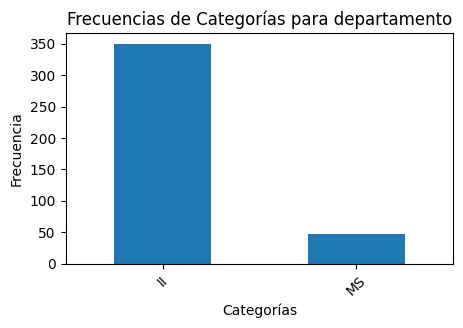

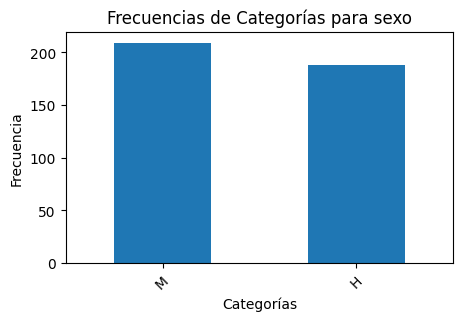

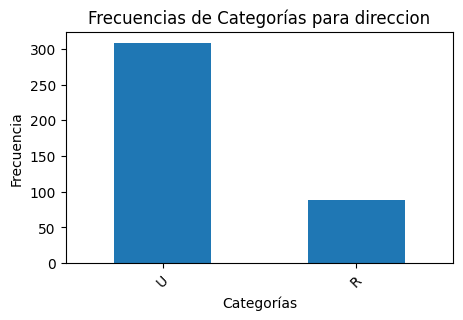

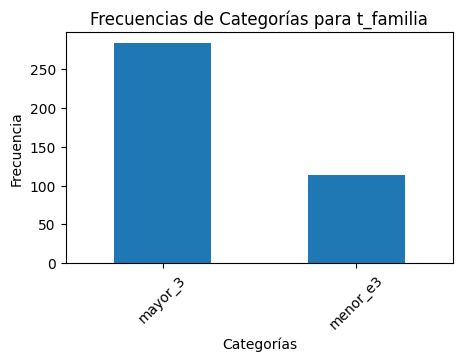

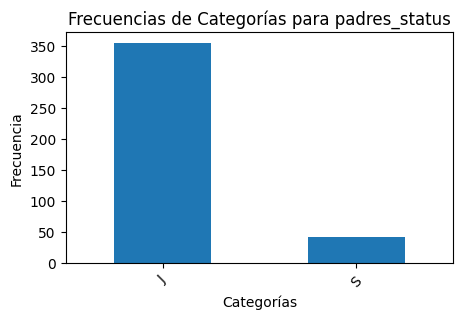

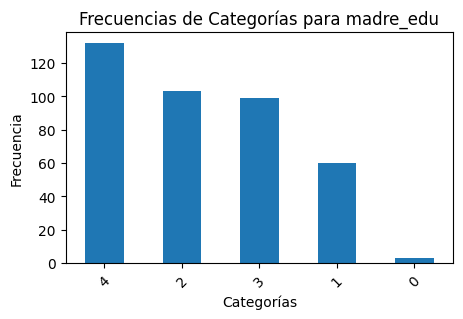

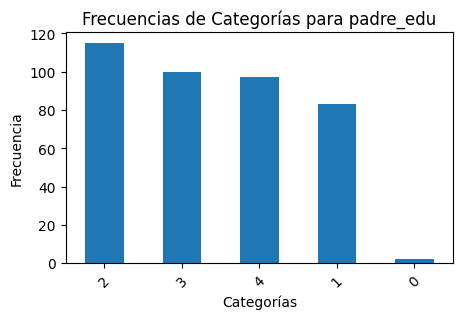

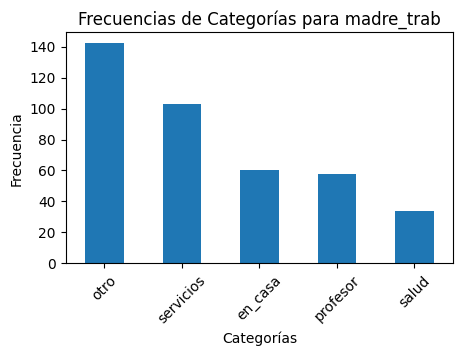

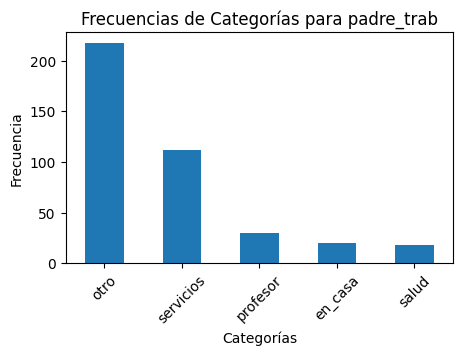

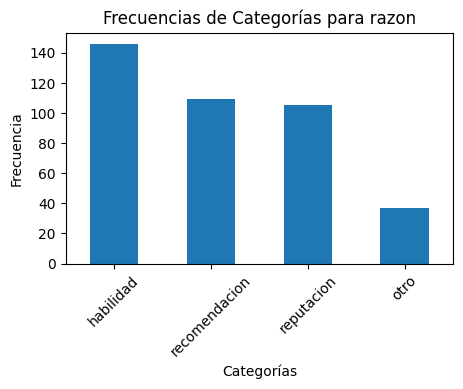

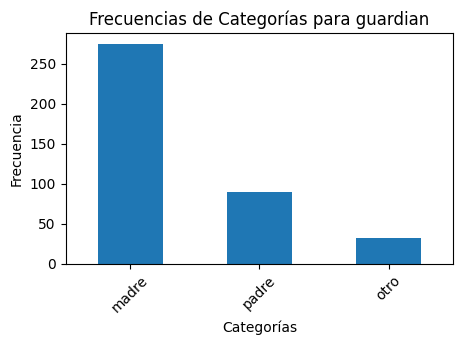

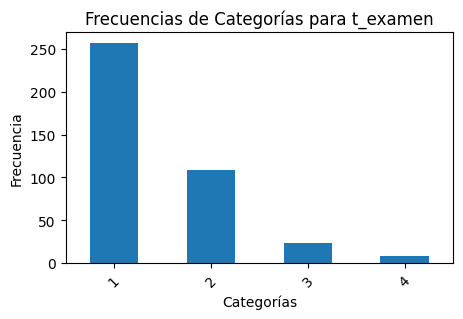

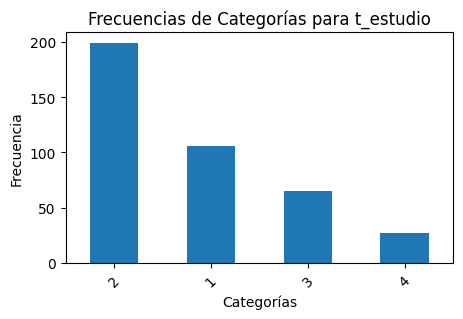

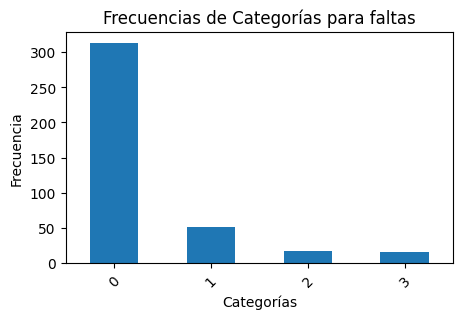

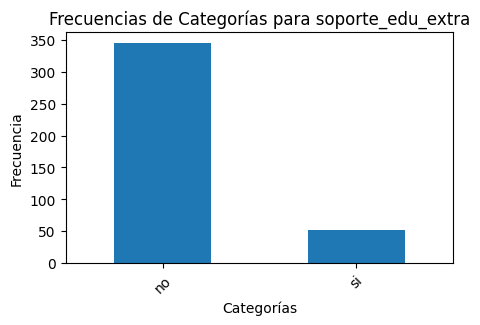

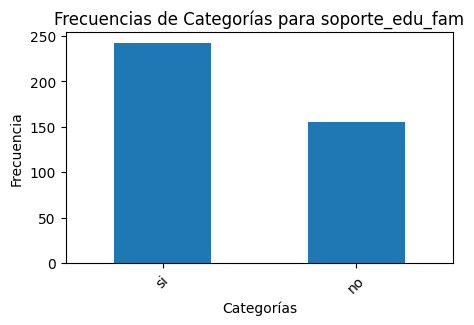

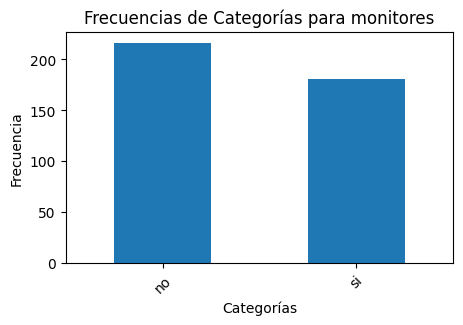

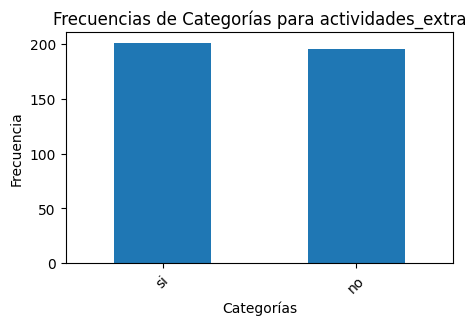

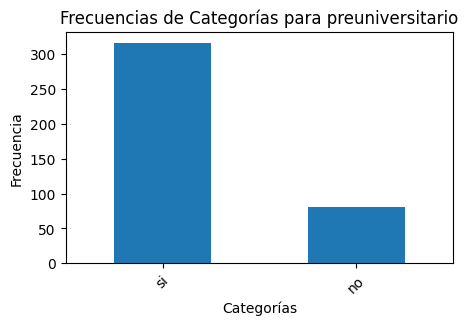

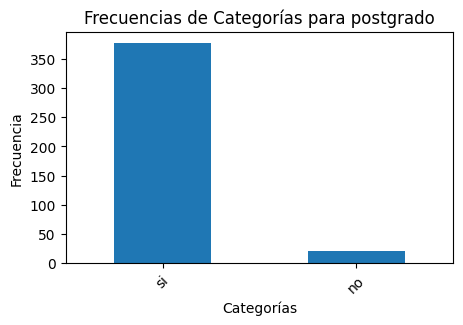

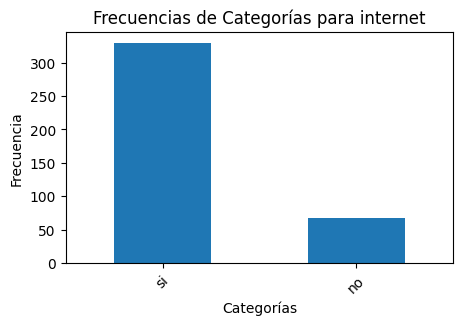

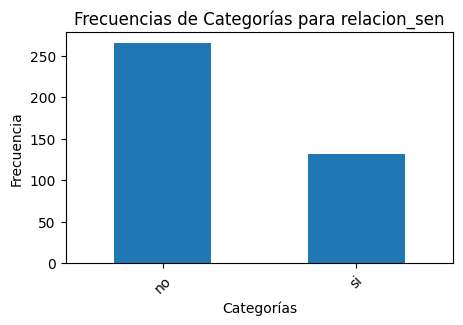

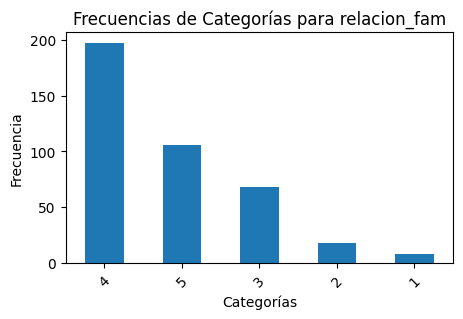

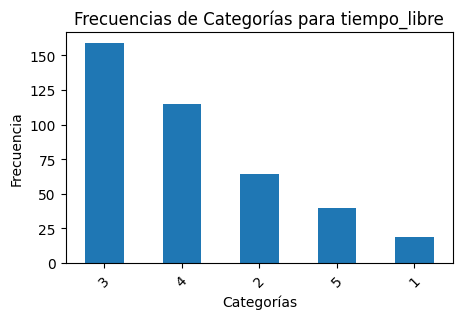

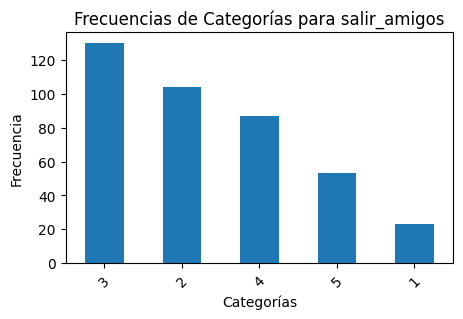

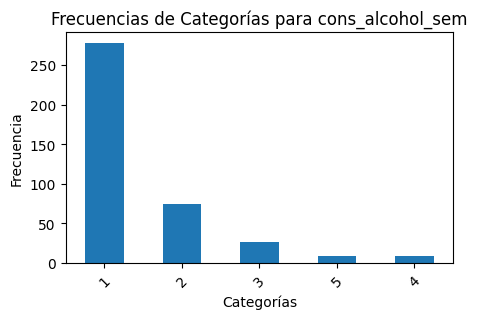

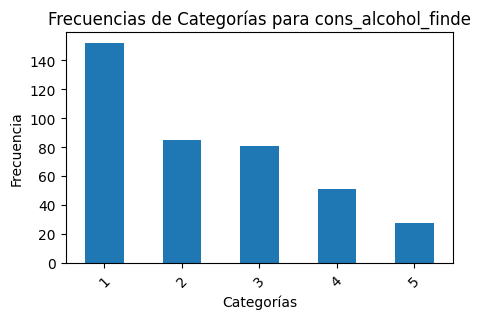

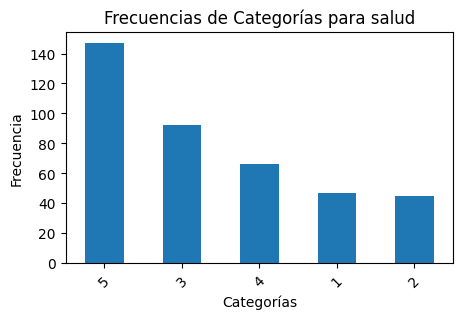

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear gráficos de barras para cada columna categórica de la base de datos calculo diferencial
for col in df_calcudif.select_dtypes(include=['object', 'category']).columns:
    plt.figure(figsize=(5, 3))
    df_calcudif[col].value_counts().plot(kind='bar')
    plt.title(f'Frecuencias de Categorías para {col}')
    plt.xlabel('Categorías')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        'Ratio': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print('##########################################')
    if plot:
        plt.figure(figsize=(12,6))
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

cat_cols = [col for col in df_calcudif.columns if df_calcudif[col].dtypes == "O"]
for col in cat_cols:
    cat_summary(df_calcudif, col, plot=False)

              departamento      Ratio
departamento                         
II                     350  88.161209
MS                      47  11.838791
##########################################
      sexo      Ratio
sexo                 
M      209  52.644836
H      188  47.355164
##########################################
           direccion      Ratio
direccion                      
U                308  77.581864
R                 89  22.418136
##########################################
           t_familia      Ratio
t_familia                      
mayor_3          283  71.284635
menor_e3         114  28.715365
##########################################
               padres_status      Ratio
padres_status                          
J                        355  89.420655
S                         42  10.579345
##########################################
           madre_edu      Ratio
madre_edu                      
4                132  33.249370
2                103  25.944584
3

En los diagramas de barras y las tablas de porcentajes, se observa que la variable categórica "departamento" presenta subcategorías desbalanceadas: 'II' representa el 88.16% de los datos, mientras que 'MS' representa solo el 11.83%. Una situación similar ocurre con las variables "dirección", "t_familia", "padres_status", "soporte_edu_extra", "postgrado" e "internet", donde una subcategoría concentra más del 80% de los datos. Este desbalance implica que estas variables no contribuyen a distinguir entre diferentes clases o patrones en el modelo, por lo tanto, no se tendran en cuenta en el modelo.

# <font color='056938'> **2. Análisis univariado para variables númericas** </font>


<font color='056938'> *** Distribuciones** </font>

**Calculo diferencial**

In [ ]:
df_calcudif.describe()

,edad,faltas,ausencias,nota_01,nota_02,nota_03
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,16.705290,0.335013,5.695214,10.881612,10.687657,10.377834
std,1.279716,0.742714,7.988015,3.333120,3.770322,4.604928
min,15.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,0.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,0.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,3.000000,75.000000,19.000000,19.000000,20.000000


Se observa en la tabla que el promedio de ausencias es de 6; sin embargo, el mayor número de ausencias registrado es 75. Esto indica la presencia de un dato atípico significativo, ya que el valor extremo de 75 se desvía considerablemente del promedio.

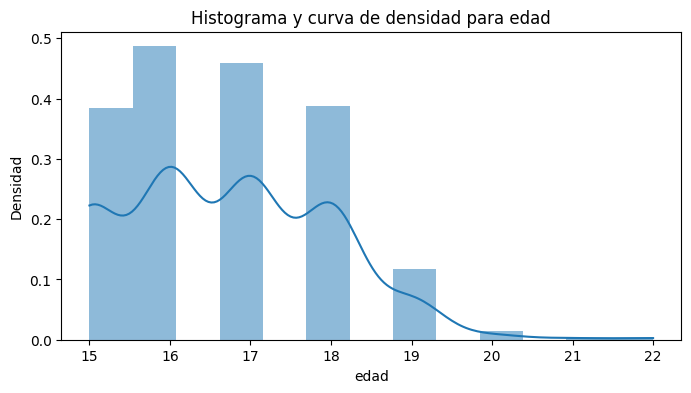

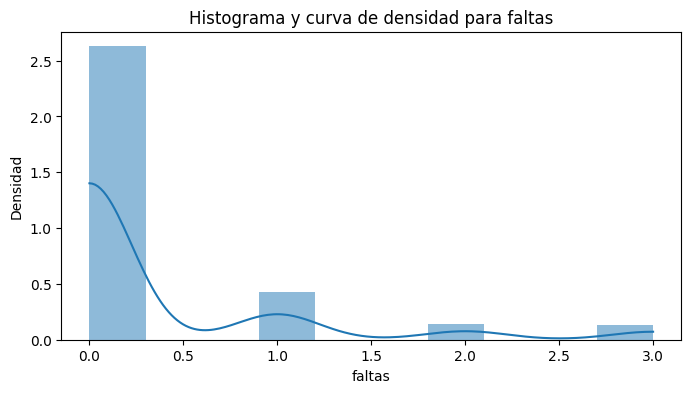

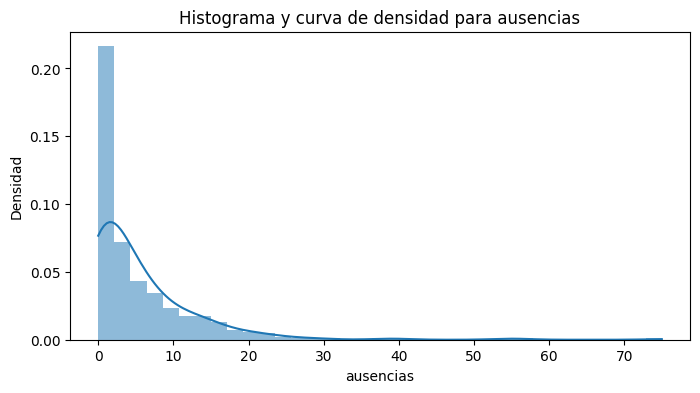

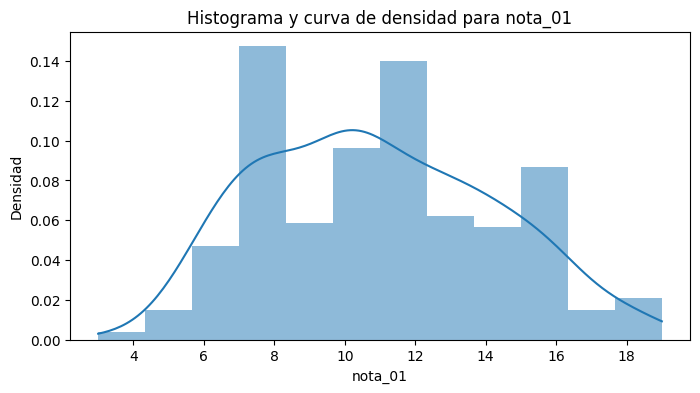

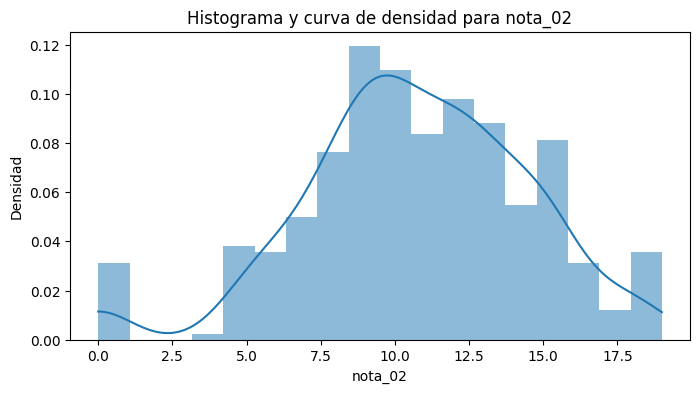

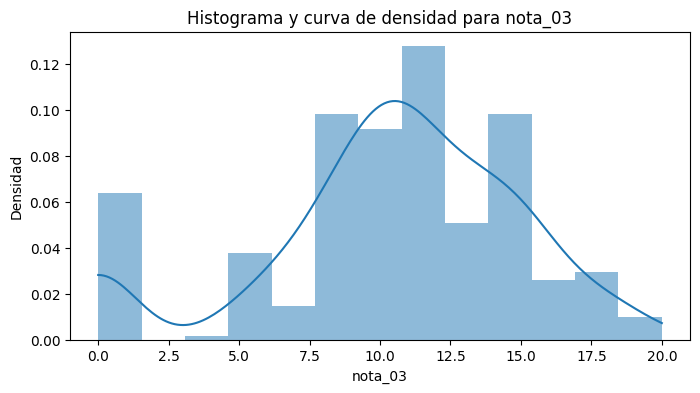

In [ ]:
# Graficar el histograma con la curva de densidad para cada columna numérica de la base de datos de calculo diferencial
#for col in numeric_cols:
for col in df_calcudif.select_dtypes(include=['int', 'float']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_calcudif[col], kde=True, stat="density", linewidth=0)
    plt.title(f"Histograma y curva de densidad para {col}")
    plt.xlabel(col)
    plt.ylabel("Densidad")
    plt.show()

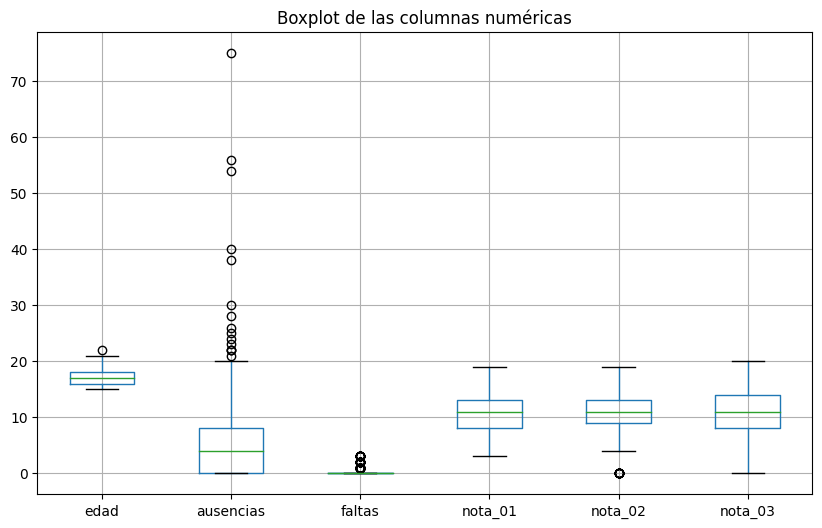

In [ ]:
numeric_cols = ['edad','ausencias', 'faltas', 'nota_01', 'nota_02', 'nota_03']
plt.figure(figsize=(10, 6))
df_calcudif[numeric_cols].boxplot()
plt.title("Boxplot de las columnas numéricas")
plt.show()

Del análisis de los histogramas y boxplots se puede observar lo siguiente:

* Variable nota_1: Presenta una distribución aproximadamente normal, lo que indica que la mayoría de los estudiantes tienen calificaciones cerca del promedio, con pocas calificaciones extremadamente altas o bajas.

* Variables ausencias y nota_2: Muestran una distribución asimétrica con presencia de valores atípicos o extremos.

* Variable faltas: muestra una distribución asimetrica, donde el promedio de las faltas es cero
* Variable nota_3 (variable de respuesta): Aunque el histograma sugiere una distribución asimétrica, el boxplot indica que no hay valores atípicos en esta variable.

<font color='056938'> *** Valores atipicos** </font>

Para verificar los valores atipicos se utiliza la tecnica de  Rango Intercuartílico

El RIC es una medida de dispersión que indica la distancia entre el primer cuartil (Q1) y el tercer cuartil (Q3) de una distribución. Puede utilizarse para identificar outliers al ayudar a definir los límites a partir de los cuales los valores se consideran atípicos. Estos límites se calculan de la siguiente manera:

Límite inferior = Q1 — (k * RIC) Límite superior = Q3 + (k * RIC)

donde k se puede reemplazar por 1.5 (outlier) o por 3 (outlier extremo). Los valores que se encuentren por debajo del límite inferior o por encima del límite superior se consideran outliers.

In [ ]:
# Calcular cuartiles a partir de la función percentil
Q3 = df_calcudif['nota_02'].quantile(0.75) # Tercer cuartil = Percentil 75
Q1 = df_calcudif['nota_02'].quantile(0.25) # Primer cuartil + Percentil 25

# Obtener RIC
ric = Q3 - Q1

# Definir limite inferior y superior
superior = Q3 + (1.5 * ric)
inferior = Q1 - (1.5* ric)

# Identificar outliers
outliers_RIC = df_calcudif[(df_calcudif['nota_02'] < inferior) | (df_calcudif['nota_02']> superior)]
outliers_RIC

,departamento,sexo,edad,direccion,t_familia,padres_status,madre_edu,padre_edu,madre_trab,padre_trab,...,relacion_fam,tiempo_libre,salir_amigos,cons_alcohol_sem,cons_alcohol_finde,salud,ausencias,nota_01,nota_02,nota_03
130,II,M,15,R,mayor_3,J,3,4,servicios,profesor,...,4,2,2,2,2,5,0,12,0,0
131,II,M,15,U,mayor_3,J,1,1,en_casa,otro,...,4,3,3,1,2,4,0,8,0,0
134,II,H,15,R,mayor_3,J,3,4,en_casa,profesor,...,5,3,3,1,1,5,0,9,0,0
135,II,M,15,U,mayor_3,J,4,4,servicios,en_casa,...,4,3,3,1,1,5,0,11,0,0
136,II,H,17,R,mayor_3,J,3,4,en_casa,otro,...,5,4,5,2,4,5,0,10,0,0
137,II,M,16,U,mayor_3,S,3,3,otro,otro,...,4,3,2,1,1,5,0,4,0,0
144,II,H,17,U,mayor_3,J,2,1,otro,otro,...,5,4,5,1,2,5,0,5,0,0
153,II,H,19,U,mayor_3,J,3,2,servicios,en_casa,...,4,5,4,1,1,4,0,5,0,0
162,II,H,16,U,menor_e3,J,1,2,otro,otro,...,4,4,4,2,4,5,0,7,0,0
242,II,H,16,U,menor_e3,J,4,3,profesor,otro,...,5,4,5,1,1,3,0,6,0,0


In [ ]:
# Calcular cuartiles a partir de la función percentil
Q3_1 = df_calcudif['ausencias'].quantile(0.75) # Tercer cuartil = Percentil 75
Q1_1 = df_calcudif['ausencias'].quantile(0.25) # Primer cuartil + Percentil 25

# Obtener RIC
ric = Q3_1 - Q1_1

# Definir limite inferior y superior
superior = Q3_1 + (1.5 * ric)
inferior = Q1_1 - (1.5* ric)

# Identificar outliers
outliers_RIC_1 = df_calcudif[(df_calcudif['ausencias'] < inferior) | (df_calcudif['ausencias']> superior)]
outliers_RIC_1

,departamento,sexo,edad,direccion,t_familia,padres_status,madre_edu,padre_edu,madre_trab,padre_trab,...,relacion_fam,tiempo_libre,salir_amigos,cons_alcohol_sem,cons_alcohol_finde,salud,ausencias,nota_01,nota_02,nota_03
40,II,M,16,U,menor_e3,J,2,2,otro,otro,...,3,3,3,1,2,3,25,7,10,11
74,II,M,16,U,mayor_3,J,3,3,otro,servicios,...,4,3,3,2,4,5,54,11,12,11
103,II,M,15,U,mayor_3,J,3,2,servicios,otro,...,4,3,5,1,1,2,26,7,6,6
183,II,M,17,U,menor_e3,J,3,3,otro,otro,...,5,3,3,2,3,1,56,9,9,8
198,II,M,17,U,mayor_3,J,4,4,servicios,profesor,...,4,2,4,2,3,2,24,18,18,18
205,II,M,17,U,mayor_3,J,3,4,en_casa,servicios,...,4,4,3,3,4,5,28,10,9,9
216,II,M,17,U,mayor_3,J,4,3,otro,otro,...,3,4,5,2,4,1,22,6,6,4
260,II,M,18,U,mayor_3,J,4,3,servicios,otro,...,3,1,2,1,3,2,21,17,18,18
276,II,M,18,R,mayor_3,S,3,2,otro,servicios,...,4,1,1,1,1,5,75,10,9,9
277,II,H,18,U,mayor_3,J,4,4,profesor,servicios,...,3,2,4,1,4,3,22,9,9,9


<font color='056938'> **¿Qué decisión se toma frente a los outliers?** </font>

Se opta por utilizar la estrategia de imputación para conservar la mayor cantidad posible de datos. En lugar de eliminar los valores atípicos, se reemplazan por la mediana. Esta decisión permite mantener la integridad del conjunto de datos al tiempo que se maneja la presencia de outliers de manera efectiva, minimizando su impacto en el análisis.

In [ ]:
# Imputación de outliers con la mediana

# Calcular la mediana
mediana = df_calcudif['nota_02'].median()

# Imputar outliers ecnontrados con z-score modificado con la mediana
calcudif_imputado = df_calcudif.copy()
calcudif_imputado.loc[outliers_RIC.index, 'nota_02'] = mediana
calcudif_imputado

,departamento,sexo,edad,direccion,t_familia,padres_status,madre_edu,padre_edu,madre_trab,padre_trab,...,relacion_fam,tiempo_libre,salir_amigos,cons_alcohol_sem,cons_alcohol_finde,salud,ausencias,nota_01,nota_02,nota_03
0,II,M,18,U,mayor_3,S,4,4,en_casa,profesor,...,4,3,4,1,1,3,6,5,6,6
1,II,M,17,U,mayor_3,J,1,1,en_casa,otro,...,5,3,3,1,1,3,4,5,5,6
2,II,M,15,U,menor_e3,J,1,1,en_casa,otro,...,4,3,2,2,3,3,10,7,8,10
3,II,M,15,U,mayor_3,J,4,2,salud,servicios,...,3,2,2,1,1,5,2,15,14,15
4,II,M,16,U,mayor_3,J,3,3,otro,otro,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,MS,H,21,R,mayor_3,J,1,1,otro,otro,...,5,5,3,3,3,3,3,10,8,7
393,MS,H,18,R,menor_e3,J,3,2,servicios,otro,...,4,4,1,3,4,5,0,11,12,10
394,MS,H,19,U,menor_e3,J,1,1,otro,en_casa,...,3,2,3,3,3,5,5,8,9,9
395,II,M,18,U,mayor_3,S,4,4,en_casa,profesor,...,4,3,4,1,1,3,6,5,6,6


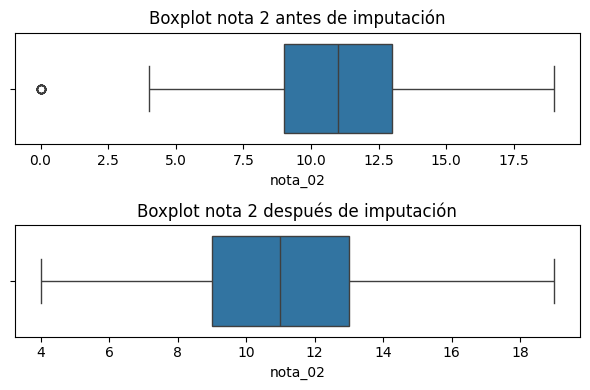

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un marco grafico 2x1
fig, axes = plt.subplots(2, 1, figsize = (6, 4))

# Crear una boxplot antes y después de la imputación
sns.boxplot(data = df_calcudif, x = 'nota_02', ax = axes[0])
sns.boxplot(data = calcudif_imputado, x = 'nota_02', ax = axes[1])

# Adicionar nombres
axes[0].set_title('Boxplot nota 2 antes de imputación')
axes[1].set_title('Boxplot nota 2 después de imputación')

plt.tight_layout()

In [ ]:
# Imputación de outliers con la mediana

# Calcular la mediana
mediana_1 = df_calcudif['ausencias'].median()

# Imputar outliers ecnontrados con z-score modificado con la mediana
calcudif_imputado = df_calcudif.copy()
calcudif_imputado.loc[outliers_RIC_1.index, 'ausencias'] = mediana_1
calcudif_imputado

,departamento,sexo,edad,direccion,t_familia,padres_status,madre_edu,padre_edu,madre_trab,padre_trab,...,relacion_fam,tiempo_libre,salir_amigos,cons_alcohol_sem,cons_alcohol_finde,salud,ausencias,nota_01,nota_02,nota_03
0,II,M,18,U,mayor_3,S,4,4,en_casa,profesor,...,4,3,4,1,1,3,6,5,6,6
1,II,M,17,U,mayor_3,J,1,1,en_casa,otro,...,5,3,3,1,1,3,4,5,5,6
2,II,M,15,U,menor_e3,J,1,1,en_casa,otro,...,4,3,2,2,3,3,10,7,8,10
3,II,M,15,U,mayor_3,J,4,2,salud,servicios,...,3,2,2,1,1,5,2,15,14,15
4,II,M,16,U,mayor_3,J,3,3,otro,otro,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,MS,H,21,R,mayor_3,J,1,1,otro,otro,...,5,5,3,3,3,3,3,10,8,7
393,MS,H,18,R,menor_e3,J,3,2,servicios,otro,...,4,4,1,3,4,5,0,11,12,10
394,MS,H,19,U,menor_e3,J,1,1,otro,en_casa,...,3,2,3,3,3,5,5,8,9,9
395,II,M,18,U,mayor_3,S,4,4,en_casa,profesor,...,4,3,4,1,1,3,6,5,6,6


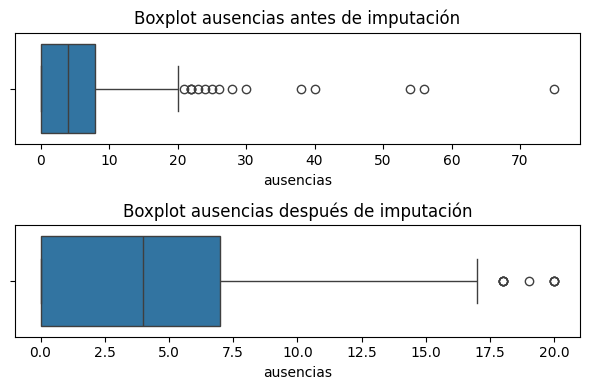

In [ ]:
# Crear un marco grafico 2x1
fig, axes = plt.subplots(2, 1, figsize = (6, 4))

# Crear una boxplot antes y después de la imputación
box1= sns.boxplot(data = df_calcudif, x = 'ausencias', ax = axes[0])
box2= sns.boxplot(data =calcudif_imputado, x ='ausencias', ax = axes[1])

# Adicionar nombres
axes[0].set_title('Boxplot ausencias antes de imputación')
axes[1].set_title('Boxplot ausencias después de imputación')

plt.tight_layout()

# <font color='056938'> **3. Análisis bivariado** </font>
---
**Calculo diferencial**

**Correlación variables númericas con la variable respuesta**

Se realiza la correlación de Spearman, utilizada cuando las variables no siguen una distribución normal. Como se observó anteriormente, las variables "ausencias" y "nota 2" no presenta una distribución normal, por lo que este método es adecuado.

In [ ]:
# Seleccionar las variables numéricas
#Se utiliza la base de datos de calculo difencial imputada
numeric_vars = calcudif_imputado.select_dtypes(include=['int', 'float']).columns

# Calcular correlación de Spearman
spearman_corr = calcudif_imputado[numeric_vars].corr(method='spearman')['nota_03']

print("\nCorrelaciones de Spearman con la variable respuesta 'nota_3':")
print(spearman_corr)


Correlaciones de Spearman con la variable respuesta 'nota_3':
edad        -0.181769
ausencias    0.035001
nota_01      0.878812
nota_02      0.957317
nota_03      1.000000
Name: nota_03, dtype: float64


Se observa que las variables "edad" y "ausencias" no tienen una relación significativa con la variable de respuesta, ya que sus coeficientes de correlación están cerca de cero; en el caso de "edad", incluso presenta un valor negativo. Mientras que nota 1 y 2 si tienen correlación con la variable respuesta.


Observemos a continuación como es el comportamiento entre las variables nota 3 y ausencias:

In [ ]:
import plotly.express as px

# Agrupar y calcular la mediana de las notas por número de ausencias
#Se utiliza la base de calculo diferencial que fue imputada
base = calcudif_imputado.groupby(['ausencias'])[['nota_03']].median().reset_index().sort_values('nota_03', ascending=True)

# Crear gráfica de barras
fig = px.bar(base, x='ausencias', y='nota_03', barmode='group', title='<b> Nota 3 según el número de Ausencias<b>')

# Agregar detalles a la gráfica
fig.update_layout(
    xaxis_title='Número de Ausencias',
    yaxis_title='Nota 3',
    template='simple_white',
    title_x=0.5
)

fig.show()

El gráfico revela que las ausencias no parecen tener un impacto significativo en las calificaciones. Aunque intuitivamente podríamos esperar que un mayor número de ausencias afectara negativamente el rendimiento académico, los datos muestran lo contrario. Por ejemplo:

Los estudiantes con cero ausencias tienen una mediana de notas relativamente baja, alrededor de 10. Por otro lado, un estudiante con 20 ausencias tiene una mediana de nota de 12.5, que no difiere mucho de la nota de los estudiantes sin ausencias.

**Correlación variables categoricas con la variable respuesta**

Para evaluar la correlación, se utiliza el Análisis de Varianza (ANOVA), que permite comparar las medias de la variable de respuesta entre las diferentes categorías de una variable categórica.


In [ ]:

# Variables categóricas
categorical_vars = []

for col in df_calcudif.select_dtypes(include=['object', 'category']).columns:
    categorical_vars.append(col)

# Realizar ANOVA para cada variable categórica
anova_results = {}
for cat_var in categorical_vars:
    # Agrupar datos por la variable categórica y nata 3
    grouped_data = [group['nota_03'].values for name, group in df_calcudif.groupby(cat_var)]

    # ANOVA
    f_statistic, p_value = stats.f_oneway(*grouped_data)
    anova_results[cat_var] = (f_statistic, p_value)

# Mostrar resultados
for cat_var, (f_statistic, p_value) in anova_results.items():
    print(f"Variable categórica: {cat_var}")
    print(f"Estadístico F: {f_statistic:.4f}, Valor p: {p_value:.4f}")
    if p_value < 0.05:
        print("Al menos una de las categorías de la variable categórica tiene una media significativamente diferente en la variable nota 3")
    else:
        print("No hay diferencias significativas en la nota 03 entre las categorías de esta variable.")
    print()

Variable categórica: departamento
Estadístico F: 1.3763, Valor p: 0.2414
No hay diferencias significativas en la nota 03 entre las categorías de esta variable.

Variable categórica: sexo
Estadístico F: 3.8847, Valor p: 0.0494
Al menos una de las categorías de la variable categórica tiene una media significativamente diferente en la variable nota 3

Variable categórica: direccion
Estadístico F: 5.1793, Valor p: 0.0234
Al menos una de las categorías de la variable categórica tiene una media significativamente diferente en la variable nota 3

Variable categórica: t_familia
Estadístico F: 2.9335, Valor p: 0.0875
No hay diferencias significativas en la nota 03 entre las categorías de esta variable.

Variable categórica: padres_status
Estadístico F: 1.0657, Valor p: 0.3025
No hay diferencias significativas en la nota 03 entre las categorías de esta variable.

Variable categórica: madre_edu
Estadístico F: 6.2900, Valor p: 0.0001
Al menos una de las categorías de la variable categórica tiene u

De lo anterior concluimos que las siguientes variables categóricas tiene un efecto en la variable respuesta.




* sexo
* Dirección
* madre_edu
* padre_edu
* madre_trab
* faltas
* monitores
* postgrado
* internet
* relacion_sen
* tiempo_libre
* salir_amigos

A continuación, se presentan algunos gráficos que ilustran el comportamiento de la variable de respuesta en relación con variables categóricas.

In [ ]:
base = df_calcudif.groupby(['faltas'])[['nota_03']].median().reset_index().sort_values('nota_03', ascending=True)

# Crear gráfica de barras
fig = px.bar(base, x='faltas', y='nota_03', barmode='group', title='<b> Nota 3 según las faltas <b>')

# Agregar detalles a la gráfica
fig.update_layout(
    xaxis_title='Faltas',
    yaxis_title='Nota 3',
    template='simple_white',
    title_x=0.5
)

fig.show()


Se observa que los estudiantes sin faltas obtienen calificaciones más altas, mientras que aquellos con un mayor número de faltas tienden a tener calificaciones más bajas. Es decir, que el número de faltas si afecta la nota 3

In [ ]:
base = df_calcudif.groupby(['salud'])[['nota_03']].median().reset_index().sort_values('nota_03', ascending=True)

# Crear gráfica de barras
fig = px.bar(base, x='salud', y='nota_03', barmode='group', title='<b> Nota 3 según el estado de salud <b>')

# Agregar detalles a la gráfica
fig.update_layout(
    xaxis_title='Estado de salud',
    yaxis_title='Nota 3',
    template='simple_white',
    title_x=0.5
)

fig.show()

Aunque intuitivamente se podría suponer que la salud tiene una relación con el rendimiento académico, tanto el gráfico como el ANOVA indican lo contrario. Los resultados muestran que, independientemente del estado de salud del estudiante, las calificaciones son prácticamente las mismas.

# <font color='056938'> **c)Preparación de los datos** </font>
---
<font color='056938'> **1. Selección de variables** </font>

Con base en el análisis realizado, se ha determinado que las variables numéricas que muestran una correlación significativa con la variable de respuesta son nota1 y nota2. Entre las variables categóricas, las que presentan una relación relevante con la variable de respuesta incluyen sexo, Dirección, madre_edu, padre_edu, madre_trab, faltas, monitores, postgrado, internet, relacion_sen, tiempo_libre y salir_amigos.

Sin embargo, se ha observado que algunas variables, como dirección, postgrado e internet, presentan un desbalance en sus datos, donde una subcategoría domina con más del 80% de los datos, lo que puede afectar la interpretación de su impacto.

Por lo tanto, para el modelo se seleccionarán las siguientes variables:

* nota1
* nota 2
* madre_edu
* padre_edu
* madre_trab
* faltas
* monitores
* relacion_sen
* tiempo_libre
* salir_amigos

<font color='056938'> **2. Encoders** </font>

Se realiza Encoders que son técnicas utilizadas para transformar datos categóricos en un formato numérico para que el modelo pueda entender.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
calcudif_imputado["relacion_sen"]=le.fit_transform(calcudif_imputado["relacion_sen"])
calcudif_imputado["relacion_sen"]

,relacion_sen
0,0
1,0
2,0
3,1
4,0
...,...
392,0
393,0
394,0
395,0


In [ ]:
calcudif_imputado["relacion_sen"].value_counts()

,count
relacion_sen,
0,265
1,132


Las variables categoricas que poseen mas de 2 subcategorias se convierten en dummies


In [ ]:
selected_columns = [
    'nota_01', 'nota_02', 'faltas','madre_edu', 'padre_edu', 'madre_trab',
     'relacion_sen', 'monitores', 'tiempo_libre', 'salir_amigos'
]

# Crear un nuevo DataFrame solo con las columnas seleccionadas
X_features = calcudif_imputado[selected_columns]

# Aplicar pd.get_dummies para convertir variables categóricas a dummy variables
X_features_ohe = pd.get_dummies(X_features)

X_features_ohe.head()

,nota_01,nota_02,relacion_sen,faltas_0,faltas_1,faltas_2,faltas_3,madre_edu_0,madre_edu_1,madre_edu_2,...,tiempo_libre_1,tiempo_libre_2,tiempo_libre_3,tiempo_libre_4,tiempo_libre_5,salir_amigos_1,salir_amigos_2,salir_amigos_3,salir_amigos_4,salir_amigos_5
0,5,6,0,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,5,5,0,True,False,False,False,False,True,False,...,False,False,True,False,False,False,False,True,False,False
2,7,8,0,False,False,False,True,False,True,False,...,False,False,True,False,False,False,True,False,False,False
3,15,14,1,True,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
4,6,10,0,True,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False


In [ ]:
X_features.dtypes

,0
nota_01,int64
nota_02,int64
faltas,object
madre_edu,object
padre_edu,object
madre_trab,object
relacion_sen,int64
monitores,object
tiempo_libre,object
salir_amigos,object


<font color='056938'> **3. Estandarización de las variables** </font>


Se estandarizan las variables numéricas nota_1 y nota_2 para que estén en la



misma escala que la variable relacion_sen, ya que las notas están en una escala de 0 a 20, mientras que relacion_sen se encuentra en una escala binaria de 0 y 1.

In [ ]:
# hacer transformación de escalado
X_features_ohe['nota_01'] = (X_features_ohe['nota_01'] - X_features_ohe['nota_01'].min())/(X_features_ohe['nota_01'].max() - X_features_ohe['nota_01'].min())
X_features_ohe['nota_02'] = (X_features_ohe['nota_02'] - X_features_ohe['nota_02'].min())/(X_features_ohe['nota_02'].max() - X_features_ohe['nota_02'].min())
X_features_ohe.head()

,nota_01,nota_02,relacion_sen,faltas_0,faltas_1,faltas_2,faltas_3,madre_edu_0,madre_edu_1,madre_edu_2,...,tiempo_libre_1,tiempo_libre_2,tiempo_libre_3,tiempo_libre_4,tiempo_libre_5,salir_amigos_1,salir_amigos_2,salir_amigos_3,salir_amigos_4,salir_amigos_5
0,0.1250,0.315789,0,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,0.1250,0.263158,0,True,False,False,False,False,True,False,...,False,False,True,False,False,False,False,True,False,False
2,0.2500,0.421053,0,False,False,False,True,False,True,False,...,False,False,True,False,False,False,True,False,False,False
3,0.7500,0.736842,1,True,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
4,0.1875,0.526316,0,True,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False




<font color='056938'> **4. Datos de entrenamiento** </font>

In [ ]:
y_target = calcudif_imputado["nota_03"]
y_target


,nota_03
0,6
1,6
2,10
3,15
4,10
...,...
392,7
393,10
394,9
395,6


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target, test_size=0.3, random_state=123)

**Modelo de regresión base de datos calculo diferencial**


In [ ]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train) #entrenando el modelo

LinearRegression()

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
# Imprime los coeficientes
print("Coeficientes: ", lr_reg.coef_)

# Imprime el intercepto
print("\nIntercepto: ", lr_reg.intercept_)

Coeficientes:  [ 3.37690383e+00  1.77238791e+01 -2.83383124e-01 -9.28438607e+12
 -9.28438607e+12 -9.28438607e+12 -9.28438607e+12  5.77657332e+12
  5.77657332e+12  5.77657332e+12  5.77657332e+12  5.77657332e+12
 -1.45867715e+13 -1.45867715e+13 -1.45867715e+13 -1.45867715e+13
 -1.45867715e+13 -2.18452501e+13 -2.18452501e+13 -2.18452501e+13
 -2.18452501e+13 -2.18452501e+13  1.42575466e+13  1.42575466e+13
  7.92062391e+12  7.92062391e+12  7.92062391e+12  7.92062391e+12
  7.92062391e+12 -6.15689452e+13 -6.15689452e+13 -6.15689452e+13
 -6.15689452e+13 -6.15689452e+13]

Intercepto:  79330609032742.69


In [ ]:
lr_pred = lr_reg.predict(X_test) #predicción
lr_pred

array([ 4.5625000e+00,  1.9359375e+01,  1.5171875e+01,  1.2796875e+01,
        1.9390625e+01,  8.7968750e+00,  1.2671875e+01,  1.5578125e+01,
        9.6875000e+00,  1.8093750e+01,  1.1375000e+01,  8.5937500e+00,
        4.1562500e+00,  9.4687500e+00,  8.7187500e+00,  8.2656250e+00,
        8.0000000e+00,  7.7343750e+00,  1.1843750e+01,  1.4781250e+01,
        1.2921875e+01,  1.1187500e+01,  4.4531250e+00,  1.0250000e+01,
        1.4640625e+01,  1.4953125e+01,  1.1625000e+01,  1.5968750e+01,
        8.9531250e+00, -3.9062500e-01,  4.5937500e+00,  1.7843750e+01,
        1.2250000e+01,  1.1765625e+01,  1.7203125e+01,  1.6078125e+01,
        8.3593750e+00,  9.6093750e+00,  8.5625000e+00,  1.2984375e+01,
        1.4437500e+01,  7.6093750e+00,  8.9687500e+00,  1.0328125e+01,
        1.0328125e+01,  1.6593750e+01,  1.0703125e+01,  4.2500000e+00,
        3.7031250e+00,  1.1859375e+01,  1.1500000e+01,  6.3281250e+00,
        8.4375000e+00,  8.9062500e+00,  1.2843750e+01,  8.7656250e+00,
      

In [ ]:
# Metricas
print("MSE: %.2f" % mean_squared_error(y_test, lr_pred))
print("RMSE %.2f" % math.sqrt(mean_squared_error(y_test, lr_pred)))
print("MAE: %.2f" % mean_absolute_error(y_test, lr_pred))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_test, lr_pred))
print("R2: %.2f" % r2_score(y_test, lr_pred))

# R2 ajustado
r2 = r2_score(y_test, lr_pred)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("R2-adjusted: %.2f" % adj_r2)

MSE: 3.98
RMSE 1.99
MAE: 1.32
MAPE: 1975602492787916.75
R2: 0.82
R2-adjusted: 0.75


In [ ]:
print("Valor mínimo de y_test:", np.min(y_test))
print("Valor máximo de y_test:", np.max(y_test))

Valor mínimo de y_test: 0
Valor máximo de y_test: 19


In [40]:
import numpy as np

# Definir un umbral pequeño (epsilon)
epsilon = 1e-5

# Filtrar y mostrar los valores cercanos a cero en y_test
near_zero_values = y_test[np.abs(y_test) <= epsilon]
print("Valores en y_test próximos a cero:")
print(near_zero_values)

# Obtener y mostrar los índices de esos valores
near_zero_indices = np.where(np.abs(y_test) <= epsilon)[0]
print("Índices de valores en y_test próximos a cero:")
print(near_zero_indices)

# Manejo de estos valores
# Por ejemplo, puedes optar por reemplazarlos con epsilon
y_test_adjusted = np.where(np.abs(y_test) <= epsilon, epsilon, y_test)

Valores en y_test próximos a cero:
150    0
264    0
242    0
170    0
387    0
296    0
148    0
396    0
134    0
173    0
160    0
162    0
Name: nota_03, dtype: int64
Índices de valores en y_test próximos a cero:
[ 0  5 29 30 48 64 69 77 78 87 90 95]
